In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score

In [7]:
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

In [8]:
data.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [9]:
data.describe()


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [11]:
data.isnull().sum()


,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [12]:
data.columns


Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [13]:
ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]


<ipython-input-14-98b7b6dbc283>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


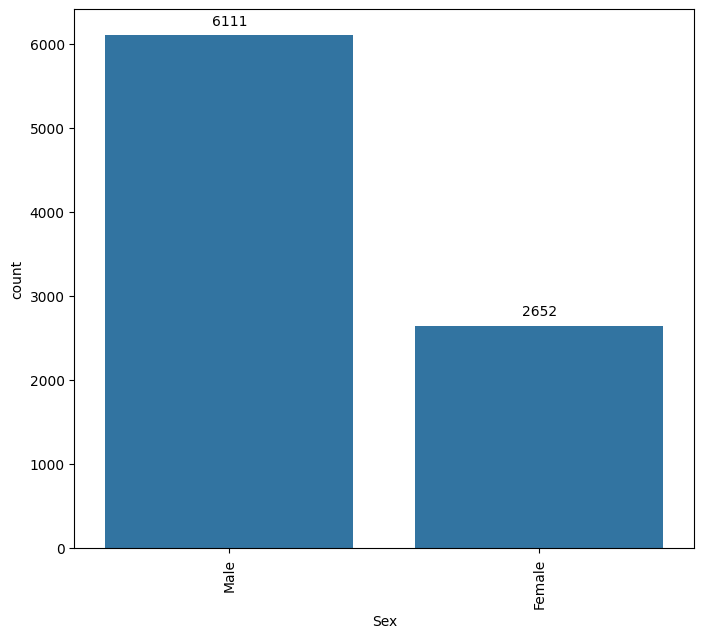

<ipython-input-14-98b7b6dbc283>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


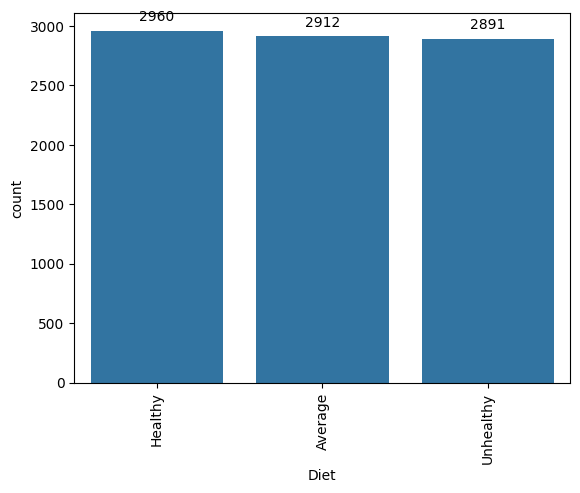

<ipython-input-14-98b7b6dbc283>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


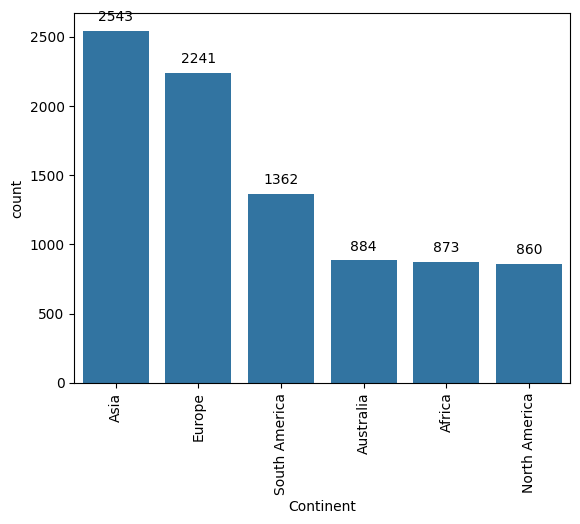

<ipython-input-14-98b7b6dbc283>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


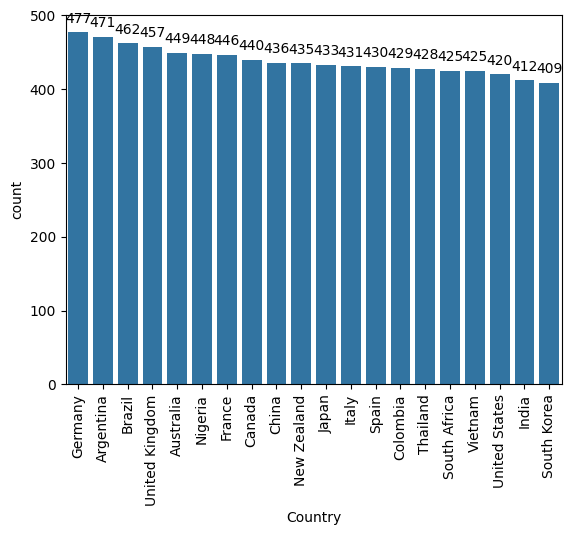

<ipython-input-14-98b7b6dbc283>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


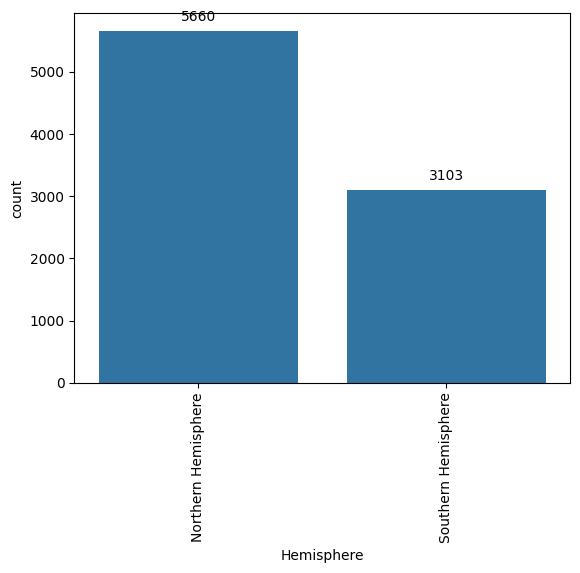

In [14]:
plt.figure(figsize=(8, 7))
for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize=10)

    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

    """
    for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)

    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show() """


<Axes: >

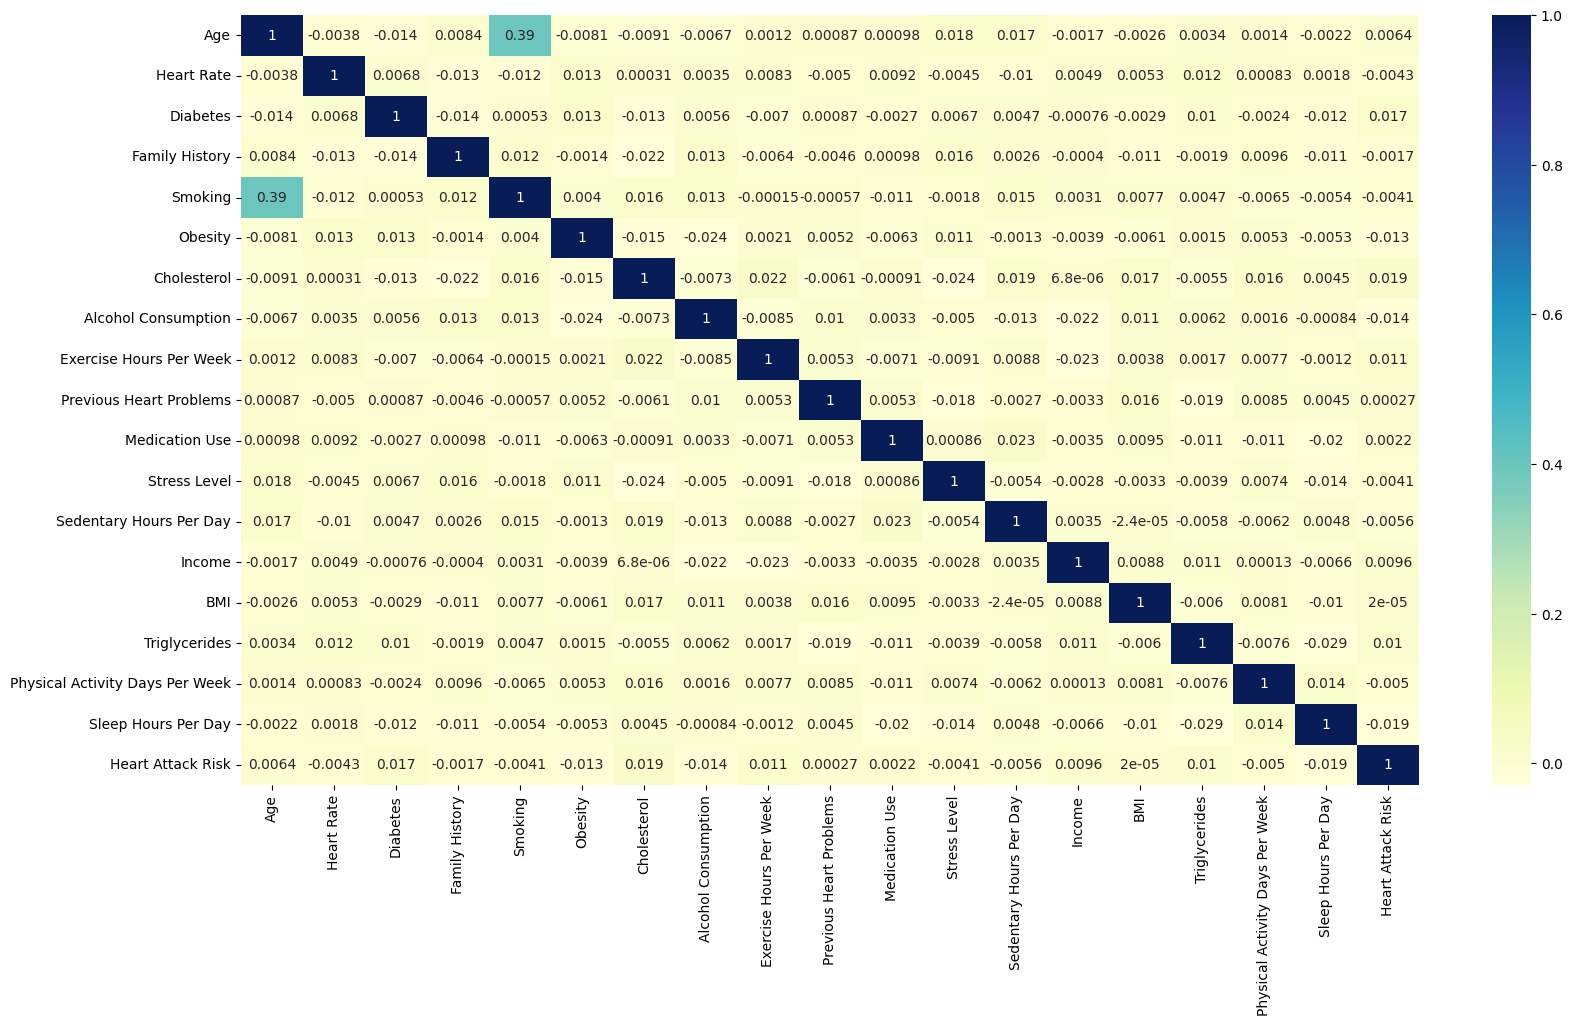

In [15]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 'Exercise Hours Per Week',
     'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

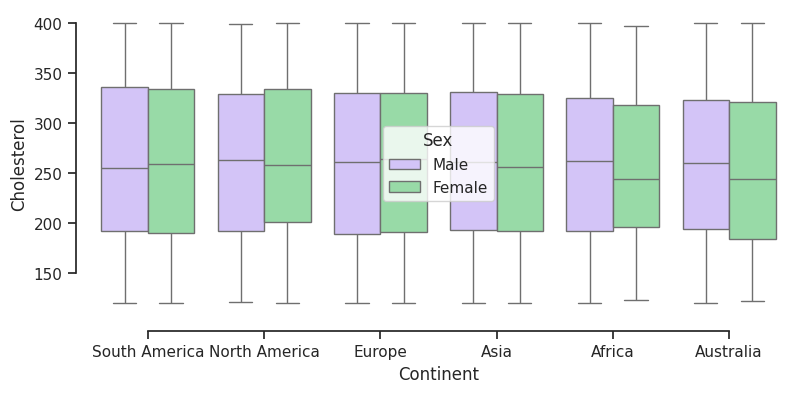

In [16]:
#Continents w.r.t Cholestrol Level range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex",
             palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

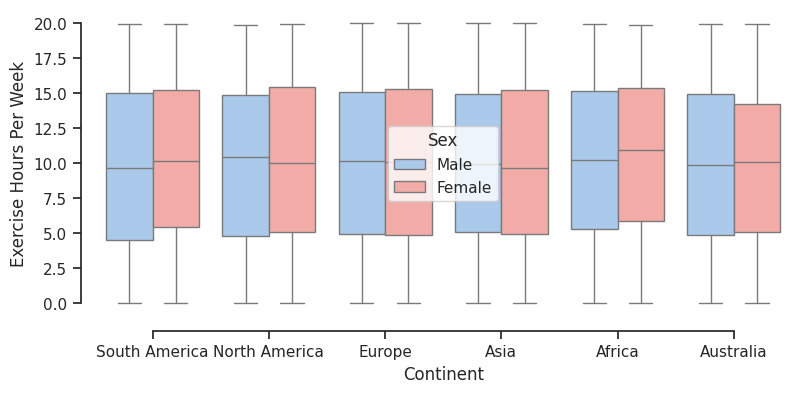

In [17]:
#Continents w.r.t Exercise Hours Per Week range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Exercise Hours Per Week',  hue="Sex",
             palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

In [18]:
data.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")
#val.sort_values(by = "BMI")

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


In [19]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [20]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [21]:
"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [22]:
"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)

In [23]:
"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

In [24]:
data.dtypes

,0
Patient ID,object
Age,int64
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


In [25]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [26]:
data.dtypes

,0
Patient ID,object
Age,int64
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


In [27]:
X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values

In [28]:
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,6.615001,261404,31.251233,286,0,6,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,...,4.963459,285768,27.194973,235,1,7,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,...,9.463426,235282,28.176571,587,4,4,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,7.648981,125640,36.464704,378,3,4,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,...,1.514821,160555,21.809144,231,1,5,91,88,0,1


In [29]:
print(y[1:10])

[0 0 0 0 1 1 1 0 0]


In [30]:
#Splitting Data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.2 , random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [32]:
#Applying and Checking Accuracy and Precision of different Classification Models
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
         'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'),
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB()}

In [33]:
for i in models:
    obj = models[i]
    obj.fit(train_X, train_y)
    obj_pred = obj.predict(test_X)
    accuracy = accuracy_score(test_y,obj_pred)
    precision = precision_score(test_y,obj_pred,zero_division=1)
    print('Accuracy of '+i+': ',accuracy)
    print('Precision of '+i+': ',precision)

Accuracy of Logistic_Regression:  0.6354820308043354
Precision of Logistic_Regression:  1.0
Accuracy of Random_Forest:  0.6343411294922989
Precision of Random_Forest:  0.475
Accuracy of XGBoost:  0.5852823730747291
Precision of XGBoost:  0.36503067484662577
Accuracy of SVM:  0.6354820308043354
Precision of SVM:  0.5
Accuracy of KNN:  0.6023958927552767
Precision of KNN:  0.3333333333333333
Accuracy of Naive_Bayes:  0.6354820308043354
Precision of Naive_Bayes:  1.0


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X=train_X, y=train_y, cv=10)

In [36]:
"""Using GridSearchCV function"""
#Define Grid
grid = [{'n_estimators':[100,300,500], 'max_depth':[None, 5,10,15],
        'min_samples_split':[2,5,10] , 'min_samples_leaf':[1,2,4]}]

#Set parameters
grid_search = GridSearchCV(estimator = rfc, param_grid = grid, scoring = 'accuracy', cv=8,
                    n_jobs = -1,verbose = 2)
grid_search = grid_search.fit(train_X, train_y)
grid_search.best_score_

Fitting 8 folds for each of 108 candidates, totalling 864 fits


0.6435093888463681

In [37]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [38]:
grid_search.best_score_

0.6435093888463681

In [39]:
#Getting Prediction with ideal parameters
rfc = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2,
 n_estimators= 100)
rfc.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [40]:
rfc_pred = rfc.predict(test_X)
accuracy = accuracy_score(test_y,rfc_pred)
print(accuracy)

0.6360524814603536


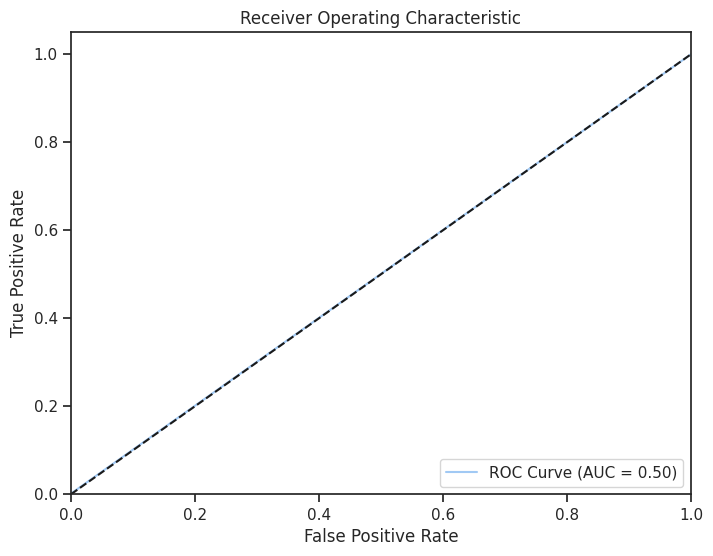

In [41]:
#Area under ROC Curve
fpr, tpr, thresholds = roc_curve(test_y, rfc_pred)
auc = roc_auc_score(test_y, rfc_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.9/750.9 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.5 MB/s eta 0:00:00


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from scipy.spatial import KDTree

# Convert dataset into graph format
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_nodes = len(X_scaled)
x = torch.tensor(X_scaled, dtype=torch.float)

# Create edges based on similarity
k = 5  # Number of nearest neighbors
tree = KDTree(X_scaled)
edges = []

for i in range(num_nodes):
    _, neighbors = tree.query(X_scaled[i], k=k+1)
    for neighbor in neighbors[1:]:  # Skip self-connection
        edges.append((i, neighbor))

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Convert labels
y_tensor = torch.tensor(y, dtype=torch.long)


# Create Graph Data Object
graph_data = Data(x=x, edge_index=edge_index, y=y_tensor)

# Define GNN Model
class HeartAttackGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HeartAttackGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize Model
model = HeartAttackGNN(input_dim=x.shape[1], hidden_dim=16, output_dim=2)
optimizer = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = nn.CrossEntropyLoss()

# Training Loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data)
    loss = loss_fn(out, graph_data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Model Evaluation
model.eval()
with torch.no_grad():
    predictions = model(graph_data).argmax(dim=1)
    accuracy = (predictions == graph_data.y).sum().item() / num_nodes
    print(f"GNN Test Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 1.1966
Epoch 10, Loss: 0.6970
Epoch 20, Loss: 0.6757
Epoch 30, Loss: 0.6616
Epoch 40, Loss: 0.6546
Epoch 50, Loss: 0.6521
Epoch 60, Loss: 0.6504
Epoch 70, Loss: 0.6491
Epoch 80, Loss: 0.6481
Epoch 90, Loss: 0.6473
GNN Test Accuracy: 0.6418
